In [2]:

from imagededup.methods import CNN
import threading
import numpy as np
import matplotlib.pyplot as plt
import cv2

cnn = CNN()


2020-11-15 09:51:55,942: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling


In [3]:

def ploting(imgDIr, duplicates, photoPath):
    images = []

    img = cv2.imread(photoPath)

    plt.subplot(2, 6, 3), plt.imshow(img)
    plt.title("original")
    counter = 0
    for key, value in duplicates.items():
        path = imgDIr + "\\" + key
        img = cv2.imread(path)

        images.append(img)

        counter += 1
        if counter == 4:
            break
    i = 1
    for ele in images:
        if i==3:
            i+=1
        plt.subplot(1, 6, i), plt.imshow(ele)
        plt.title("duplicate")

        i += 1

    plt.savefig('final_images', format="jpg")  # To save figure
    plt.show()  # To show figure



In [4]:

def hammingDistance(n1, n2):
    x = n1 ^ n2
    setBits = 0

    while (x > 0):
        setBits += x & 1
        x >>= 1

    return setBits


In [7]:

def cnn_encoding():
    #feature extraction
    encodings = cnn.encode_images(image_dir=r"E:\New folder")
    print("cnn", encodings)
    list = {}
    hash1 = 0
    #addition to all feature numbers
    for key, value in encodings.items():
        base = 0
        for ele in value:
            base += ele

        hash1 = hash(base)
        # print("comp", hash1)
        list[key] = hash1

    image_dir = r"E:\New folder"

    single_image_encode = cnn.encode_image(r"E:\New folder\DSC_3366.JPG")

    imahePath = r"E:\New folder\DSC_3366.JPG"
    result = 0
    hash2 = 0
    for ele in single_image_encode[0]:
        # print(ele)
        result += ele
    hash2 = hash(result)

    hashes_dict = {}

    print(list)
    for key, value in list.items():
        hashes_dict[key] = (hammingDistance(hash2, value))

    print(hashes_dict)
    min = 0
    pn = ""
    sorted_x = sorted(hashes_dict.items(), key=lambda kv: kv[1])
    print("sorted: ", sorted_x[0:5])

    sort_dict = {}

    for ele in sorted_x:
        sort_dict[ele[0]] = ele[1]
    print(sort_dict)

    for key, value in hashes_dict.items():
        if min == 0:
            min = value
            pn = key
            # print(key)
        if value < min:
            min = value
            pn = key
    print(f"the more similar photo to the one we entered is {pn} score is {min}")
    ploting(image_dir, sort_dict, imahePath)


2020-11-15 11:01:18,552: INFO Start: Image encoding generation


1/1 [==============================] - 0s 997us/step


2020-11-15 11:01:46,275: INFO End: Image encoding generation


cnn {'DSC_3290.jpg': array([3.0945757e-05, 1.0211816e+00, 3.9535474e-02, ..., 1.2517208e+00,
       1.4133184e-01, 1.0582943e-02], dtype=float32), 'DSC_3291.jpg': array([0.67000437, 0.2621126 , 0.29860613, ..., 0.8270419 , 0.7611875 ,
       0.54552525], dtype=float32), 'DSC_3292.jpg': array([0.        , 0.33672842, 0.02061912, ..., 1.115575  , 0.33552644,
       0.89969224], dtype=float32), 'DSC_3294.jpg': array([0.        , 0.5354696 , 0.01225532, ..., 0.436734  , 1.246838  ,
       0.5778972 ], dtype=float32), 'DSC_3295.jpg': array([0.42696956, 0.65405786, 0.24782239, ..., 3.3949368 , 1.472614  ,
       0.67375183], dtype=float32), 'DSC_3296.jpg': array([0.4721752 , 1.3080504 , 0.10301467, ..., 0.58092993, 0.18115507,
       0.7126837 ], dtype=float32), 'DSC_3299.jpg': array([1.0374277 , 0.22333491, 1.0170033 , ..., 0.28725916, 0.09888887,
       1.9471481 ], dtype=float32), 'DSC_3300.jpg': array([1.3752784 , 1.0262084 , 0.6352073 , ..., 1.4646032 , 0.27169526,
       1.1975417 ], d

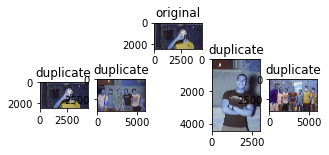

end


In [8]:
cnn_encoding()

print("end")
